In [165]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette("RdPu", 2)
sns.set_style("darkgrid")
#importing all nececessary libraries and setting color scheme for the graphs made using seasborn

In [166]:
df = pd.read_csv('Earthquakes.csv')
#read earthquakes dataset into DataFrame called df

In [167]:
df = df[:30000]
#taking only the first 30000 rows in the dataset as original dataset was almost 800 thousand rows

In [168]:
date_col = 'time'
datetimes = df[date_col].str.split('T', expand = True)
dates = pd.to_datetime(datetimes.loc[:, 0], format = '%Y-%m-%d')
df = pd.concat((df, dates.rename('date')), axis=1)
df = df.drop(date_col, axis=1)
#time column included unnecessary "HH-MM-SS" time format along with the date of earthquakes
#above code takes only the "Y-m-d" date format from the "time" column and assigns it to a "dates" variable which is then assigned to its own column "date"
#original "time" column is then dropped from the DataFrame


In [169]:
df.head()
#DataFrame head is checked to see all columns and if custom "date" column was created succesfully

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,date
0,23.261,120.277,15.0,6.3,mw,NaN,NaN,NaN,NaN,iscgem,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-12-08
1,18.233,96.298,10.0,7.4,mw,NaN,NaN,NaN,NaN,iscgem,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-12-03
2,25.854,98.356,35.0,6.2,mw,NaN,NaN,NaN,NaN,iscgem,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-12-02
3,18.779,-106.767,15.0,6.3,mw,NaN,NaN,NaN,NaN,iscgem,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-11-28
4,35.050,139.129,15.0,6.9,mw,NaN,NaN,NaN,NaN,iscgem,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1930-11-25


In [170]:
df.info()
#DataFrame info is checked to see count of all rows and column datatype
#count is capped at 30000 which means code to take first 30000 rows was successful
#notice depth column has 29995 non-null values which means 5 rows have null values in depth column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   latitude         30000 non-null  float64       
 1   longitude        30000 non-null  float64       
 2   depth            29995 non-null  float64       
 3   mag              30000 non-null  float64       
 4   magType          29998 non-null  object        
 5   nst              15611 non-null  float64       
 6   gap              15520 non-null  float64       
 7   dmin             13753 non-null  float64       
 8   rms              15520 non-null  float64       
 9   net              30000 non-null  object        
 10  id               30000 non-null  object        
 11  updated          30000 non-null  object        
 12  place            0 non-null      float64       
 13  type             0 non-null      float64       
 14  horizontalError  0 non-null      float

In [171]:
df.describe()
#describe shows count and several other mathematical information relating the DataFrame 

,latitude,longitude,depth,mag,nst,gap,dmin,rms,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
count,30000.000000,30000.000000,29995.000000,30000.000000,15611.000000,15520.000000,13753.000000,15520.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,24.574789,-46.487988,33.096595,4.278533,6.846711,224.151604,0.699826,0.486594,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,23.868442,112.657362,75.934857,1.326132,6.774893,90.720505,0.522332,0.794096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-70.518000,-179.991000,-1.832000,2.500000,0.000000,12.000000,0.001802,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,19.146500,-118.398000,6.000000,3.080000,4.000000,144.000000,0.316900,0.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,33.853417,-116.148750,9.900000,4.000000,5.000000,232.000000,0.579600,0.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,35.742667,68.139500,33.000000,5.500000,8.000000,306.000000,0.972100,0.570000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,86.681000,179.999000,678.000000,9.500000,98.000000,360.000000,4.009000,42.410000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [172]:
df = df[['date', 'latitude', 'longitude', 'depth', 'mag']]
df.head()
#take only numerical columns nececessary for our data visualization and model training and discard the rest of the columns

,date,latitude,longitude,depth,mag
0,1930-12-08,23.261,120.277,15.0,6.3
1,1930-12-03,18.233,96.298,10.0,7.4
2,1930-12-02,25.854,98.356,35.0,6.2
3,1930-11-28,18.779,-106.767,15.0,6.3
4,1930-11-25,35.050,139.129,15.0,6.9


In [173]:
df.dropna(inplace=True)
df.info()
#now we can see all columns have 29995 non-null values which means all rows with null values have been dropped

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29995 entries, 0 to 29999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       29995 non-null  datetime64[ns]
 1   latitude   29995 non-null  float64       
 2   longitude  29995 non-null  float64       
 3   depth      29995 non-null  float64       
 4   mag        29995 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 1.4 MB


<AxesSubplot:xlabel='Count', ylabel='mag'>

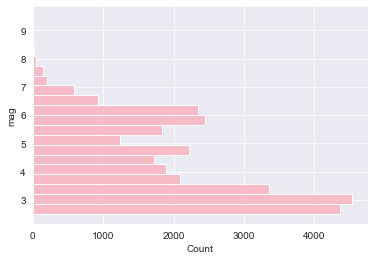

In [174]:
sns.histplot(data=df, y='mag', bins=20)
#histogram visualizing the number of earthquakes that occured against their magnitude
#we can see earthquakes with a magnitude less than 4 occur the most while earthquakes with magnitude over 7 are very rare
#average number of earthquakes occured sits between magnitude 5 and 6 

(0.0, 250.0)

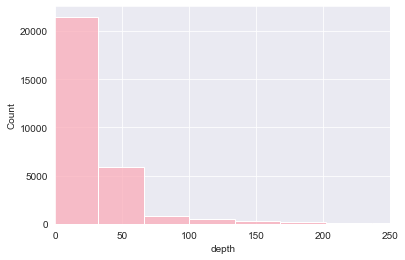

In [176]:
sns.histplot(data=df, x='depth', bins=20)
plt.xlim(0,250)
#histogram to show number of earthquakes occured with their corresponding depths
#75% of earthquakes recorded had a depth anywhere between 0 and 30
#count dropped drastically amounting to only 6000 when depth increased from 30 to 60
#earthquakes recorded with depths greater than 100 rarely occured

<AxesSubplot:>

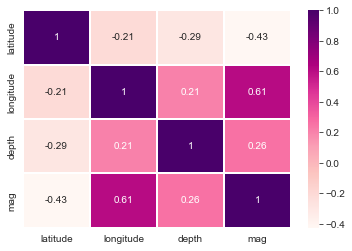

In [177]:
sns.heatmap(df.corr(), annot=True, linewidth=0.2, cmap='RdPu')
#heatmap to show correlation between the DataFrame columns
#heatmap does not show much correlation
#longtitude and magntitude share the highest correlation score of 0.61 with magnitude and depth coming in second at 0.26

longtitude and magnitude have somewhat good correlation. depth and magnitude shows very little correlation.

<AxesSubplot:xlabel='date', ylabel='Count'>

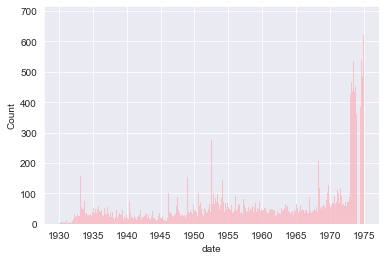

In [178]:
sns.histplot(data=df, x='date', bins=500)
#number of earthquakes recorded at each year 
#we can see a steady increase in earthquakes occuring from 1930 to 1970 with a few years experiencing more than the average number of earthquakes
#the years that came after 1972 however saw a massive increase in earthquakes recorded. Almost triple to be exact

In [179]:
df.drop(df.index[df['mag'] > 6.5], inplace=True)
#dropping all rows with magnitude greater than 6.5 as they are very rare and will skew our data

In [180]:
df.drop(df.index[df['depth'] > 65], inplace=True)
#dropping all rows with depth greater than 65 as they are very rare and will skew our data

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


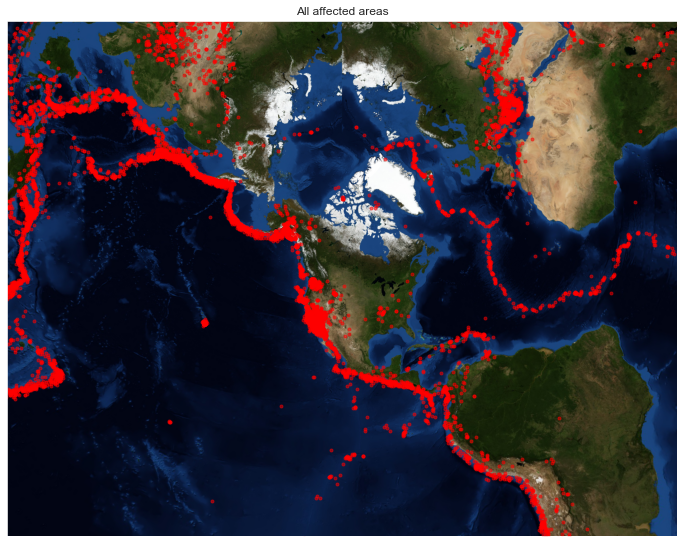

In [181]:
from mpl_toolkits.basemap import Basemap


m = Basemap(width=26000000,height=20000000,projection='lcc',
            resolution='c',lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.) #setting up the map with certain parameters
longitudes = df["longitude"].tolist()#converting the longitude column to a list
latitudes = df["latitude"].tolist()#converting the latitude column to a list
x,y = m(longitudes,latitudes)#converting the longitude and latitude to x and y coordinates

fig = plt.figure(figsize=(12,10))#setting the size of the figure
plt.title("All affected areas")#setting the title of the figure
m.plot(x, y, "o", markersize = 3, color = 'red', alpha = 0.5)#plotting the x and y coordinates on the map
m.bluemarble()#implement NASA's blue marble image as the background
plt.show()#showing the figure

In [182]:
from sklearn.model_selection import train_test_split
#importing train test split to split the data for the training of the model

In [183]:
x = df[['latitude', 'longitude']]
y = df[['mag', 'depth']]
#x contains the independent variables
#y contains the target variables 

In [184]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)
#declaring the test and train variables
#setting test size to 0.2 so 80% percent of the data gets trained then tested against the remaining 20%

In [185]:
from sklearn.ensemble import RandomForestRegressor

#import the model to be used 

In [186]:
rfc = RandomForestRegressor(n_estimators=50)
#make an instance of the model with the number of trees set to 50 

In [187]:
rfc.fit(x_train, y_train)
#fit the model with the data to train it

RandomForestRegressor(n_estimators=50)

In [188]:
predictions = rfc.predict(x_test)
#predict the values using the model and the predict function

In [189]:
rfc.score(x_test, y_test)
#displaying the model's score after being trained


0.7465149539529756

In [190]:
from sklearn.metrics import mean_squared_error
#import mean squared error for model evaluation

In [191]:
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('mse: ', mse)
print('rmse: ', rmse)
#display mean squared error and root mean squared error of the model with the number of estimators set to 50

mse:  29.769761724545354
rmse:  5.456167310901065


In [192]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[400, 500, 600, 700, 800]}#setting the parameters to be tested

grid_obj = GridSearchCV(rfc, parameters, cv=5)#making an instance of the grid search cross validation
grid_fit = grid_obj.fit(x_train, y_train)#fitting the grid search cross validation with the data
best_fit = grid_fit.best_estimator_#getting the best estimator from the grid search cross validation
best_fit_pred = best_fit.predict(x_test)#predicting the values using the best estimator


In [193]:
best_fit
#to display which of the parameters for number of estimators was used to improve the model's accuracy

RandomForestRegressor(n_estimators=700)

In [194]:
best_fit.score(x_test, y_test)
#display the score of the model after hyperparameter tuning

0.7494502002472672

In [195]:
mse = mean_squared_error(y_test, best_fit_pred)
rmse = np.sqrt(mse)
print('mse: ', mse)
print('rmse: ', rmse)
#evaluate the model again this time with the new increased number of estimators 
#score is lower than the previous model which means this model performs with a smaller error rate

mse:  29.497639561749608
rmse:  5.431172945299165


In [196]:
depth_results_df = pd.DataFrame({'Actual depth': y_test['depth'], 'Predicted depth': predictions[:,1]})
depth_results_df
#DataFrame to compare the actual and predicted values of the depth column

,Actual depth,Predicted depth
27956,21.741,28.63300
13652,2.990,7.77920
22414,17.000,7.39354
9951,15.000,18.00000
17915,6.000,6.00000
...,...,...
24485,37.000,41.92000
6331,6.000,2.87860
5116,6.000,6.00000
9978,6.000,5.52940


In [197]:
mag_results_df = pd.DataFrame({'Actual mag': y_test['mag'], 'Predicted mag': predictions[:,0]})
mag_results_df
#DataFrame to compare the actual and predicted values of the mag column

,Actual mag,Predicted mag
27956,2.83,3.8354
13652,2.56,2.7844
22414,4.20,2.9548
9951,5.70,5.4260
17915,3.11,3.0598
...,...,...
24485,5.20,5.0920
6331,3.33,3.0360
5116,3.36,3.2306
9978,3.44,3.0798
